In [1]:
import sys
import os
sys.path.insert(0, os.path.dirname(os.getcwd()))
from config import *

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline

## Try a reasonable set of hps

In [19]:
clf = KNeighborsClassifier(n_neighbors=5, n_jobs=4)  # default params
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=5, p=2,
           weights='uniform')

## Learning curve

mean: 0.8238904122268855
std: 0.013549567761799679


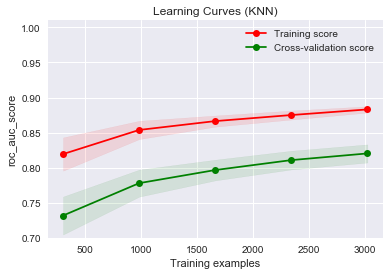

In [20]:
title = "Learning Curves (KNN)"
cv = ShuffleSplit(n_splits=10, test_size=0.2)
plot_learning_curve(clf, title, X_train, y_train, ylim=(0.7, 1.01), cv=cv, metric=roc_auc_score, n_jobs=4)

# cross validation
cv = ShuffleSplit(n_splits=10, test_size=0.2)
scores = cross_val_score(clf, X_train, y_train, scoring=make_scorer(roc_auc_score), cv=cv, n_jobs=4)
# print(scores)
print(f'mean: {scores.mean()}')
print(f'std: {scores.std()}')

## Model complexity curve

1


<module 'matplotlib.pyplot' from '/Users/Quintus/anaconda3/envs/cobra_py36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

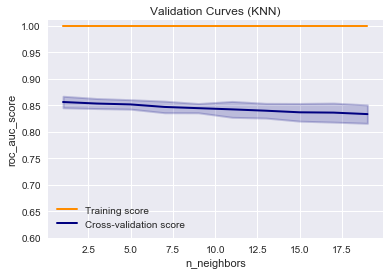

In [16]:
title = "Validation Curves (KNN)"
cv = ShuffleSplit(n_splits=10, test_size=0.2)
clf = KNeighborsClassifier(weights='distance', n_jobs=4)
plot_validation_curve(clf, title, X_train, y_train, ylim=(0.6, 1.01), cv=cv, metric=roc_auc_score, n_jobs=4, param_name='n_neighbors', param_range=np.arange(1, 20, 2))

3


<module 'matplotlib.pyplot' from '/Users/Quintus/anaconda3/envs/cobra_py36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

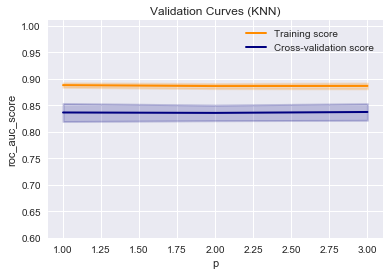

In [10]:
title = "Validation Curves (KNN)"
cv = ShuffleSplit(n_splits=10, test_size=0.2)
clf = KNeighborsClassifier()
plot_validation_curve(clf, title, X_train, y_train, ylim=(0.6, 1.01), cv=cv, metric=roc_auc_score, n_jobs=4, param_name='p', param_range=[1, 2, 3])  # different distance metrics

## Model Selection

In [3]:
params = {'n_neighbors': np.arange(1, 15, 2), 
          'weights': ['uniform', 'distance'],
         }
clf = KNeighborsClassifier(n_jobs=4)
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
gs = GridSearchCV(clf, params, scoring=make_scorer(roc_auc_score), cv=cv)
gs.fit(X_train, y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.2, train_size=None),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13]), 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(roc_auc_score), verbose=0)

In [ ]:
gs.grid_scores_

In [4]:
gs.best_params_

{'n_neighbors': 1, 'weights': 'uniform'}

In [5]:
gs.best_score_

0.8521834523373537

## Re-plot learning curve

mean: 0.8520687200438715
std: 0.013956344872094666


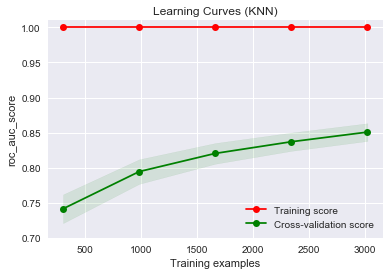

In [6]:
clf = KNeighborsClassifier(**gs.best_params_, n_jobs=4)
title = "Learning Curves (KNN)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
plot_learning_curve(clf, title, X_train, y_train, ylim=(0.7, 1.01), cv=cv, metric=roc_auc_score, n_jobs=4)

# cross validation
cv = ShuffleSplit(n_splits=100, test_size=0.2)
scores = cross_val_score(clf, X_train, y_train, scoring=make_scorer(roc_auc_score), cv=cv, n_jobs=4)
# print(scores)
print(f'mean: {scores.mean()}')
print(f'std: {scores.std()}')

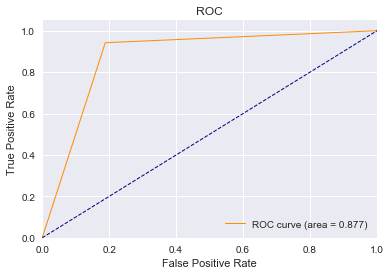

In [7]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")

# K=5

In [14]:
clf = KNeighborsClassifier(n_neighbors=5, n_jobs=4)   # k=10, almost same as k=5
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)

/Users/Quintus/anaconda3/envs/cobra_py36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:811: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(train_sizes_abs.dtype, np.float):


<module 'matplotlib.pyplot' from '/Users/Quintus/anaconda3/envs/cobra_py36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

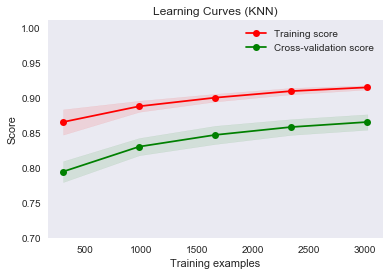

In [15]:
title = "Learning Curves (KNN)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
plot_learning_curve(clf, title, X_train, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

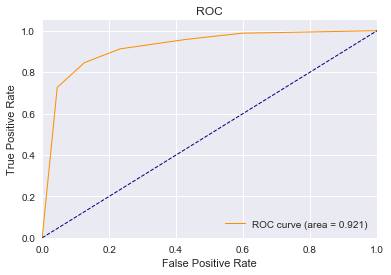

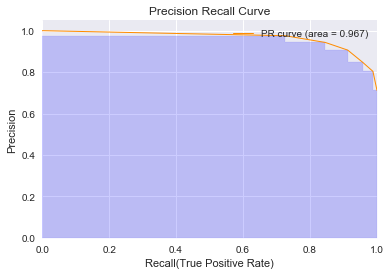

In [16]:
# plot - ROC-AUC
fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")

# plot - PR-AUC
precision, recall, _ = precision_recall_curve(y_test, y_prob[:, 1])
pr_auc = average_precision_score(y_test, y_prob[:, 1])

plt.figure()
plt.plot(recall, precision, color='darkorange', lw=1, label='PR curve (area = %0.3f)' % pr_auc)
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall(True Positive Rate)')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.legend(loc="upper right")